In this notebook, we will see how the train-test split ratio affects the model efficienty and accuracy. I will be using [Wine Datase](https://archive.ics.uci.edu/ml/datasets/wine)t from UCI Machine Learning Repository.

In [2]:
#Importing necessary and relevant dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We have two different wine dataset over here. One consisting of red wine and other with white wine.

In [4]:
redwine_df = pd.read_csv('winequality_red.csv', header = 0)
whitewine_df = pd.read_csv('winequality_white.csv', header = 0)

In [5]:
print(redwine_df.shape)
print(whitewine_df.shape)

(1599, 12)
(4898, 12)


As we can see the number of samples in white wine dataset is far more than the red wine dataset. Hence, I expect that model trained on white wine dataset might perform better. 

In [6]:
redwine_df.info()
redwine_df.duplicated().nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


2

In [7]:
whitewine_df.info()
whitewine_df.duplicated().nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


2

As we can see there are some duplicate values. We will drop the duplicate values from the both dataset.

In [8]:
redwine_df.drop_duplicates(inplace = True)
whitewine_df.drop_duplicates(inplace = True)

In [9]:
display(redwine_df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [10]:
display(whitewine_df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [11]:
for column_name in redwine_df.columns:
    unique_values = len(redwine_df[column_name].unique())
    print(" Red Wine Dataset has '{unique_values}' unique '{column_name}' values".format(column_name = column_name,unique_values=unique_values))

 Red Wine Dataset has '96' unique 'fixed acidity' values
 Red Wine Dataset has '143' unique 'volatile acidity' values
 Red Wine Dataset has '80' unique 'citric acid' values
 Red Wine Dataset has '91' unique 'residual sugar' values
 Red Wine Dataset has '153' unique 'chlorides' values
 Red Wine Dataset has '60' unique 'free sulfur dioxide' values
 Red Wine Dataset has '144' unique 'total sulfur dioxide' values
 Red Wine Dataset has '436' unique 'density' values
 Red Wine Dataset has '89' unique 'pH' values
 Red Wine Dataset has '96' unique 'sulphates' values
 Red Wine Dataset has '65' unique 'alcohol' values
 Red Wine Dataset has '6' unique 'quality' values


In [12]:
for column_name in whitewine_df.columns:
    unique_values = len(whitewine_df[column_name].unique())
    print(" White Wine Dataset has '{unique_values}' unique '{column_name}' values".format(column_name = column_name,unique_values=unique_values))

 White Wine Dataset has '68' unique 'fixed acidity' values
 White Wine Dataset has '125' unique 'volatile acidity' values
 White Wine Dataset has '87' unique 'citric acid' values
 White Wine Dataset has '310' unique 'residual sugar' values
 White Wine Dataset has '160' unique 'chlorides' values
 White Wine Dataset has '132' unique 'free sulfur dioxide' values
 White Wine Dataset has '251' unique 'total sulfur dioxide' values
 White Wine Dataset has '890' unique 'density' values
 White Wine Dataset has '103' unique 'pH' values
 White Wine Dataset has '79' unique 'sulphates' values
 White Wine Dataset has '103' unique 'alcohol' values
 White Wine Dataset has '7' unique 'quality' values


In [13]:
redwine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [14]:
whitewine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


From a quick overview it seems that, both the dataset might have outliers in free suldure dioxide and total sulfur dioxide columns as the mean is very small compared to the max

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb501ceb110>]],
      dtype=object)

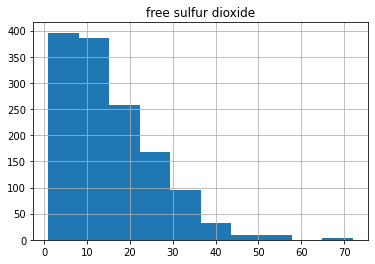

In [15]:
redwine_df.hist(column='free sulfur dioxide',bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb501bc62d0>]],
      dtype=object)

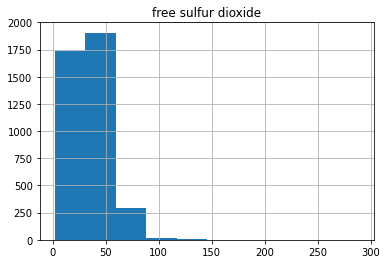

In [16]:
whitewine_df.hist(column='free sulfur dioxide',bins=10)

A quick plotting reveals that most of the extreme free sulfur dioxide values are present in white wine only.

But the legal limit is a maximun of 350mg/L hence, I will not remove the extreme free sulfur dioxide values but I will scale them during training the data.

I will add the colour label in a new column named 'type' although it is not necessary. Then I will join both the dataset as it will be easier to train the model with it.

In [17]:
redwine_df['type'] = 'red'
whitewine_df['type'] = 'white'

In [18]:
redwine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red


In [19]:
whitewine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,white


In [20]:
wines_df  = whitewine_df.append(redwine_df)

In [21]:
print("% of missing values in data\n")
for column in wines_df.columns:
    print("{}: {}%".format(column,np.round(wines_df[column].isna().sum()/wines_df[column].count(),4)*100))

% of missing values in data

fixed acidity: 0.0%
volatile acidity: 0.0%
citric acid: 0.0%
residual sugar: 0.0%
chlorides: 0.0%
free sulfur dioxide: 0.0%
total sulfur dioxide: 0.0%
density: 0.0%
pH: 0.0%
sulphates: 0.0%
alcohol: 0.0%
quality: 0.0%
type: 0.0%


As we can see there are no missing data in our dataset. 

**Exploratory Data Analysis**

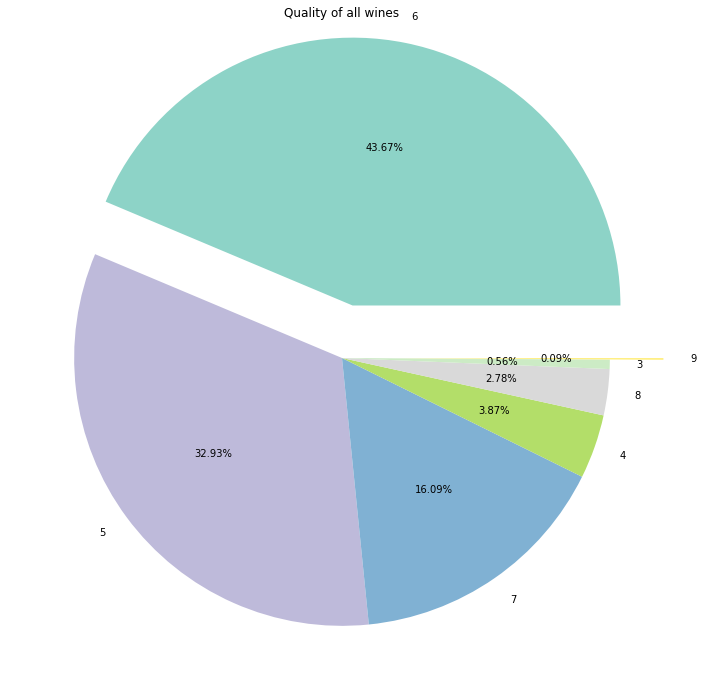

In [22]:
explode=(0.2,0,0,0,0,0,0.2)
wines_quality=wines_df.sort_values("quality", axis = 0, ascending = False, inplace = False)
wines_quality["quality"].value_counts().plot.pie(figsize=(12,15),explode=explode,autopct='%0.2f%%',colormap="Set3",title="Quality of all wines");
ax = plt.gca()
ax.axes.yaxis.set_visible(False)

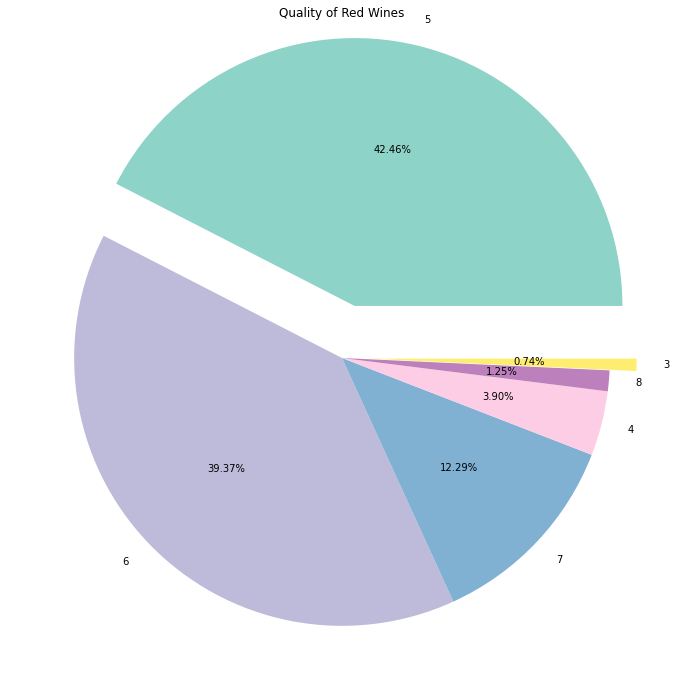

In [23]:
explode=(0.2,0,0,0,0,0.1)
redwines_quality=redwine_df.sort_values("quality", axis = 0, ascending = False, inplace = False)
redwines_quality["quality"].value_counts().plot.pie(figsize=(12,15),explode=explode,autopct='%0.2f%%',colormap="Set3",title="Quality of Red Wines");
ax = plt.gca()
ax.axes.yaxis.set_visible(False)

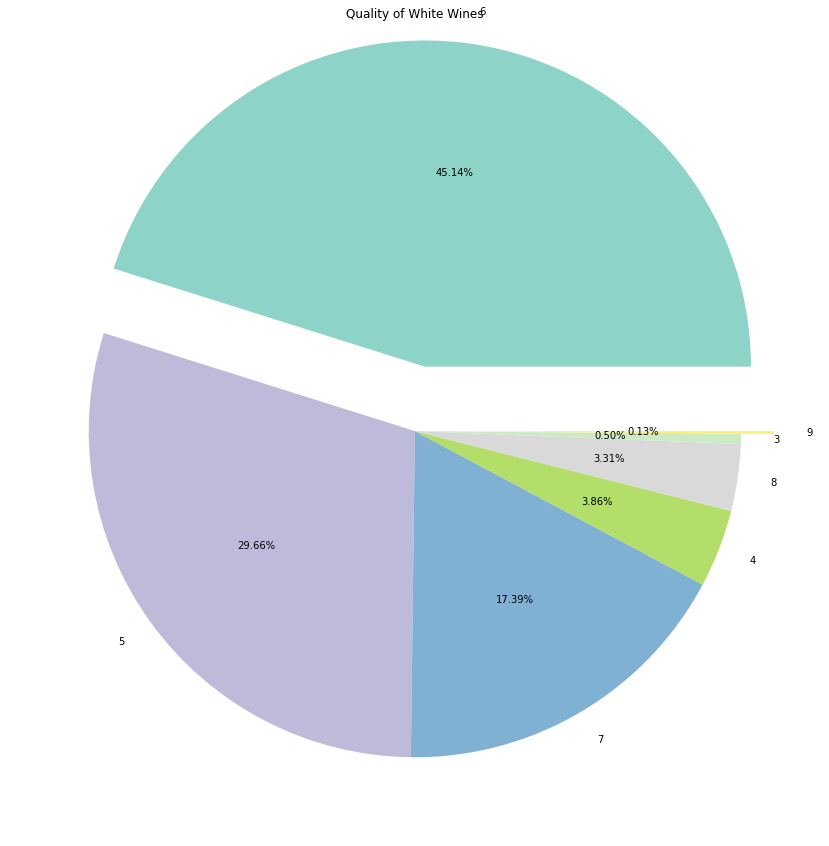

In [24]:
explode=(0.2,0,0,0,0,0,0.1)
whitewines_quality=whitewine_df.sort_values("quality", axis = 0, ascending = False, inplace = False)
whitewines_quality["quality"].value_counts().plot.pie(figsize=(15,15),explode=explode,autopct='%0.2f%%',colormap="Set3",title="Quality of White Wines");
ax = plt.gca()
ax.axes.yaxis.set_visible(False)

We can see that the avearge quality of wines is around 6. This is because the average quality of white wine is 6 and there are more data samples for white wines than the red ones.

**Machine Learning Model**

In [25]:
from sklearn.model_selection import train_test_split,KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

1. Red wine 

In [26]:
redwine_correlation = redwine_df.corr()['quality'].drop('quality')
print(redwine_correlation)

fixed acidity           0.119024
volatile acidity       -0.395214
citric acid             0.228057
residual sugar          0.013640
chlorides              -0.130988
free sulfur dioxide    -0.050463
total sulfur dioxide   -0.177855
density                -0.184252
pH                     -0.055245
sulphates               0.248835
alcohol                 0.480343
Name: quality, dtype: float64


Since there is not much correlation. I will be using all the features to train the model.

In [27]:
redwine_dataset = redwine_df.drop('type', axis=1)
y = redwine_dataset['quality']
X = redwine_dataset.drop('quality', axis=1)

Spliting of training and testing


80-20 train test split

In [28]:
X_train, X_test, label_train, label_test = train_test_split(X, y, test_size=0.2,random_state=3)

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
redwine_train = scaler.fit_transform(X_train)
redwine_test = scaler.transform(X_test)

In [30]:
fold = KFold(random_state=3, shuffle=True)
lr_model = LinearRegression()
lr_model.fit(redwine_train, label_train)

LinearRegression()

In [31]:
lr_scores = -1 * cross_val_score(lr_model, redwine_train, label_train, cv=fold, scoring='neg_root_mean_squared_error')
lr_trainscore_red80 = np.mean(lr_scores)
lr_trainscore_red80

0.6577093416125994

In [32]:
label_pred = lr_model.predict(redwine_test)
lr_testscore_red80 = mean_squared_error(label_test, label_pred, squared=False)
lr_testscore_red80

0.704075547264667

70-30 Split

In [33]:
X_train, X_test, label_train, label_test = train_test_split(X, y, test_size=0.3,random_state=3)
redwine_train = scaler.fit_transform(X_train)
redwine_test = scaler.transform(X_test)
lr_model.fit(redwine_train, label_train)
lr_scores = -1 * cross_val_score(lr_model, redwine_train, label_train, cv=fold, scoring='neg_root_mean_squared_error')
lr_trainscore_red70 = np.mean(lr_scores)
label_pred = lr_model.predict(redwine_test)
lr_testscore_red70 = mean_squared_error(label_test, label_pred, squared=False)

In [34]:
X_train, X_test, label_train, label_test = train_test_split(X, y, test_size=0.4,random_state=3)
redwine_train = scaler.fit_transform(X_train)
redwine_test = scaler.transform(X_test)
lr_model.fit(redwine_train, label_train)
lr_scores = -1 * cross_val_score(lr_model, redwine_train, label_train, cv=fold, scoring='neg_root_mean_squared_error')
lr_trainscore_red60 = np.mean(lr_scores)
print(lr_trainscore_red60)
label_pred = lr_model.predict(redwine_test)
lr_testscore_red60 = mean_squared_error(label_test, label_pred, squared=False)
print(lr_testscore_red60)

0.6518272034016936
0.6934291382542513


2. White Wine

In [35]:
whitewine_correlation = whitewine_df.corr()['quality'].drop('quality')
print(whitewine_correlation)

fixed acidity          -0.124636
volatile acidity       -0.190678
citric acid             0.007065
residual sugar         -0.117339
chlorides              -0.217739
free sulfur dioxide     0.010507
total sulfur dioxide   -0.183356
density                -0.337805
pH                      0.123829
sulphates               0.053200
alcohol                 0.462869
Name: quality, dtype: float64


In [36]:
whitewine_dataset = whitewine_df.drop('type', axis=1)
y = whitewine_dataset['quality']
X = whitewine_dataset.drop('quality', axis=1)

In [37]:
X_train, X_test, label_train, label_test = train_test_split(X, y, test_size=0.2,random_state=3)
whitewine_train = scaler.fit_transform(X_train)
whitewine_test = scaler.transform(X_test)
lr_model.fit(whitewine_train, label_train)
lr_scores = -1 * cross_val_score(lr_model, whitewine_train, label_train, cv=fold, scoring='neg_root_mean_squared_error')
lr_trainscore_white80 = np.mean(lr_scores)
print(lr_trainscore_white80)
label_pred = lr_model.predict(whitewine_test)
lr_testscore_white80 = mean_squared_error(label_test, label_pred, squared=False)
print(lr_testscore_white80)

0.7450740093992471
0.7659422267352141


In [38]:
X_train, X_test, label_train, label_test = train_test_split(X, y, test_size=0.3,random_state=3)
whitewine_train = scaler.fit_transform(X_train)
whitewine_test = scaler.transform(X_test)
lr_model.fit(whitewine_train, label_train)
lr_scores = -1 * cross_val_score(lr_model, whitewine_train, label_train, cv=fold, scoring='neg_root_mean_squared_error')
lr_trainscore_white70 = np.mean(lr_scores)
print(lr_trainscore_white70)
label_pred = lr_model.predict(whitewine_test)
lr_testscore_white70 = mean_squared_error(label_test, label_pred, squared=False)
print(lr_testscore_white70)

0.7533563721833092
0.7451570998977306


In [39]:
X_train, X_test, label_train, label_test = train_test_split(X, y, test_size=0.4,random_state=3)
whitewine_train = scaler.fit_transform(X_train)
whitewine_test = scaler.transform(X_test)
lr_model.fit(whitewine_train, label_train)
lr_scores = -1 * cross_val_score(lr_model, whitewine_train, label_train, cv=fold, scoring='neg_root_mean_squared_error')
lr_trainscore_white60 = np.mean(lr_scores)
print(lr_trainscore_white60)
label_pred = lr_model.predict(whitewine_test)
lr_testscore_white60 = mean_squared_error(label_test, label_pred, squared=False)
print(lr_testscore_white60)

0.7535151337246104
0.7523270316019882


3. Both the wines combined

In [40]:
allwine_dataset = wines_df.drop('type', axis=1)
y = allwine_dataset['quality']
X = allwine_dataset.drop('quality', axis=1)

In [41]:
X_train, X_test, label_train, label_test = train_test_split(X, y, test_size=0.2,random_state=3)
allwine_train = scaler.fit_transform(X_train)
allwine_test = scaler.transform(X_test)
lr_model.fit(allwine_train, label_train)
lr_scores = -1*cross_val_score(lr_model, allwine_train, label_train, cv=fold, scoring='neg_root_mean_squared_error')
lr_trainscore_all80 = np.mean(lr_scores)
print(lr_trainscore_all80)
label_pred = lr_model.predict(allwine_test)
lr_testscore_all80 = mean_squared_error(label_test, label_pred, squared=False)
print(lr_testscore_all80)

0.7332595682670703
0.7399496348254879


In [42]:
X_train, X_test, label_train, label_test = train_test_split(X, y, test_size=0.3,random_state=3)
allwine_train = scaler.fit_transform(X_train)
allwine_test = scaler.transform(X_test)
lr_model.fit(allwine_train, label_train)
lr_scores = -1 * cross_val_score(lr_model, allwine_train, label_train, cv=fold, scoring='neg_root_mean_squared_error')
lr_trainscore_all70 = np.mean(lr_scores)
print(lr_trainscore_all70)
label_pred = lr_model.predict(allwine_test)
lr_testscore_all70 = mean_squared_error(label_test, label_pred, squared=False)
print(lr_testscore_all70)

0.7307251191646327
0.7449279884360237


In [43]:
X_train, X_test, label_train, label_test = train_test_split(X, y, test_size=0.4,random_state=3)
allwine_train = scaler.fit_transform(X_train)
allwine_test = scaler.transform(X_test)
lr_model.fit(allwine_train, label_train)
lr_scores = -1 * cross_val_score(lr_model, allwine_train, label_train, cv=fold, scoring='neg_root_mean_squared_error')
lr_trainscore_all60 = np.mean(lr_scores)
print(lr_trainscore_all60)
label_pred = lr_model.predict(allwine_test)
lr_testscore_all60 = mean_squared_error(label_test, label_pred, squared=False)
print(lr_testscore_all60)

0.7263650510243136
0.7477537727453893


In [59]:
train_stats = np.array([[round(lr_trainscore_red60,4), round(lr_trainscore_red70,4), round(lr_trainscore_red80,4)],
                       [round(lr_trainscore_white60,4), round(lr_trainscore_white70,4), round(lr_trainscore_white80,4)],
                       [round(lr_trainscore_all60,4), round(lr_trainscore_all70,4), round(lr_trainscore_all80,4)]])

train_stats = pd.DataFrame(train_stats, columns=['60%','70%', '80%'])
train_stats.index = ['Red Wine','White Wine','Combined']
train_stats

,60%,70%,80%
Red Wine,0.6518,0.6531,0.6577
White Wine,0.7535,0.7534,0.7451
Combined,0.7264,0.7307,0.7333


In [47]:
test_stats = np.array([[round(lr_testscore_red60,4), round(lr_testscore_red70,4), round(lr_testscore_red80,4)],
                       [round(lr_testscore_white60,4), round(lr_testscore_white70,4), round(lr_testscore_white80,4)],
                       [round(lr_testscore_all60,4), round(lr_testscore_all70,4), round(lr_testscore_all80,4)]])

test_stats = pd.DataFrame(test_stats, columns=['60%','70%', '80%'])
test_stats.index = ['Red Wine','White Wine','Combined']
test_stats

,60%,70%,80%
Red Wine,0.6934,0.6948,0.7041
White Wine,0.7523,0.7452,0.7659
Combined,0.7478,0.7449,0.7399


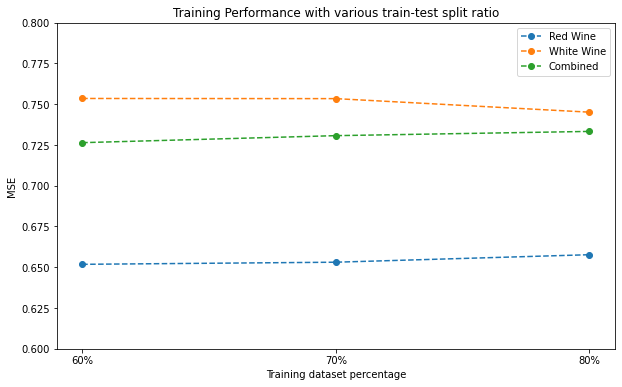

In [88]:
plt.figure(figsize = (10, 6))
plt.plot(train_stats.transpose(), marker='o', linestyle='dashed')
plt.ylim(0.6,0.8)
plt.legend(['Red Wine', 'White Wine', 'Combined'])
plt.title('Training Performance with various train-test split ratio')
plt.xlabel('Training dataset percentage')
plt.ylabel('MSE')
plt.show()

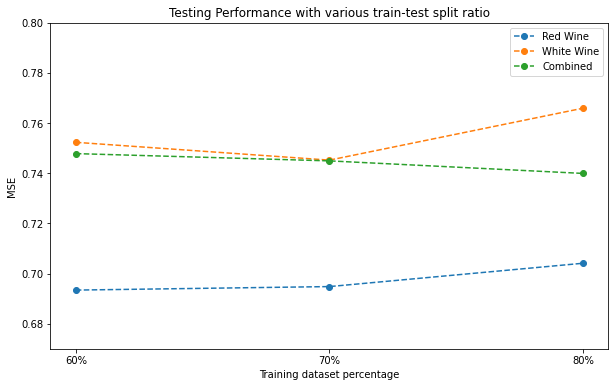

In [92]:
plt.figure(figsize = (10, 6))
plt.plot(test_stats.transpose(), marker='o', linestyle='dashed')
plt.ylim(0.67,0.8)
plt.legend(['Red Wine', 'White Wine', 'Combined'])
plt.title('Testing Performance with various train-test split ratio')
plt.xlabel('Training dataset percentage')
plt.ylabel('MSE')
plt.show()

As we can see from the plot that, more the number of trainig data sample the better the model performs. Hence with the increase of train to test split ratio, there is a chance of the machine learning model to perform better as it will have more data samples to perfrom the training.